# Projeto Big Data & Data Mining

## Consumo de propagandas: impacto dos anúncios na decisão de compra dos consumidores

### Imports

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np

### Armazenamento

In [136]:
df = pd.read_csv("../Data/df_Social_Media_Tratado.csv")
print("Dataset carregado com shape:", df.shape)

Dataset carregado com shape: (300000, 18)


### Análise

#### Informações do csv tratado

In [137]:
print("\n=== Informações gerais do DataFrame ===")
print(df.info())


=== Informações gerais do DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Campaign_Goal     300000 non-null  object 
 2   Duration_in_Days  300000 non-null  int64  
 3   Channel_Used      300000 non-null  object 
 4   Conversion_Rate   300000 non-null  float64
 5   Acquisition_Cost  300000 non-null  float64
 6   ROI               300000 non-null  float64
 7   Location          300000 non-null  object 
 8   Language          300000 non-null  object 
 9   Clicks            300000 non-null  int64  
 10  Impressions       300000 non-null  int64  
 11  Engagement_Score  300000 non-null  int64  
 12  Customer_Segment  300000 non-null  object 
 13  Date              300000 non-null  object 
 14  Company           300000 non-null  object 
 15  _Target_Audience  300000 no

#### Estatística

In [138]:
print("\n=== Estatísticas Descritivas ===")
print(df.describe())


=== Estatísticas Descritivas ===
         Campaign_ID  Duration_in_Days  Conversion_Rate  Acquisition_Cost  \
count  300000.000000     300000.000000    300000.000000     300000.000000   
mean   550444.804487         37.500000         0.080009       7753.750796   
std    260252.586037         16.770538         0.040563       4301.035148   
min    100001.000000         15.000000         0.010000        500.000000   
25%    325003.500000         26.250000         0.050000       4121.915000   
50%    551164.500000         37.500000         0.080000       7755.900000   
75%    776284.500000         48.750000         0.110000      11385.075000   
max    999998.000000         60.000000         0.150000      15000.000000   

                 ROI         Clicks    Impressions  Engagement_Score  \
count  300000.000000  300000.000000  300000.000000     300000.000000   
mean        3.177691   18153.670370   56034.236387          4.369217   
std         2.461200   11027.023294   32583.136334      

#### KPIs

In [139]:
# KPI 1: Custo Médio de Aquisição (CPA)
kpi_cpa_mean = df["Acquisition_Cost"].mean()
# KPI 2: Engajamento
kpi_engajamento = df["Engagement_Score"].mean()
# KPI 3: Público dominante
publico_dom = df['_Target_Audience'].mode().iloc[0]
# KPI 4: Idioma frequente
idioma_freq = df['Language'].mode().iloc[0]
# KPI 5: Canal mais utilizado
top_canal = df['Channel_Used'].mode().iloc[0]

print("\n=== KPIs do Projeto ===")
print(f"KPI 1 — Custo Médio de Aquisição (CPA): {kpi_cpa_mean:.2f}")
print(f"KPI 2 — Engajamento Médio: {kpi_engajamento:.2f}")
print(f"KPI 3 — Público Dominante: {publico_dom}")
print(f"KPI 4 — Idioma frequente: {idioma_freq}")
print(f"KPI 5 — Canal mais utilizado: {top_canal}")


=== KPIs do Projeto ===
KPI 1 — Custo Médio de Aquisição (CPA): 7753.75
KPI 2 — Engajamento Médio: 4.37
KPI 3 — Público Dominante: Women
KPI 4 — Idioma frequente: English
KPI 5 — Canal mais utilizado: Facebook


#### ROI

In [140]:
#ROI médio por canal
Canal_roi = df.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=False)
print("ROI médio por canal:")
print(Canal_roi)

ROI médio por canal:
Channel_Used
Instagram    4.008786
Twitter      4.002236
Facebook     3.986930
Pinterest    0.716431
Name: ROI, dtype: float64


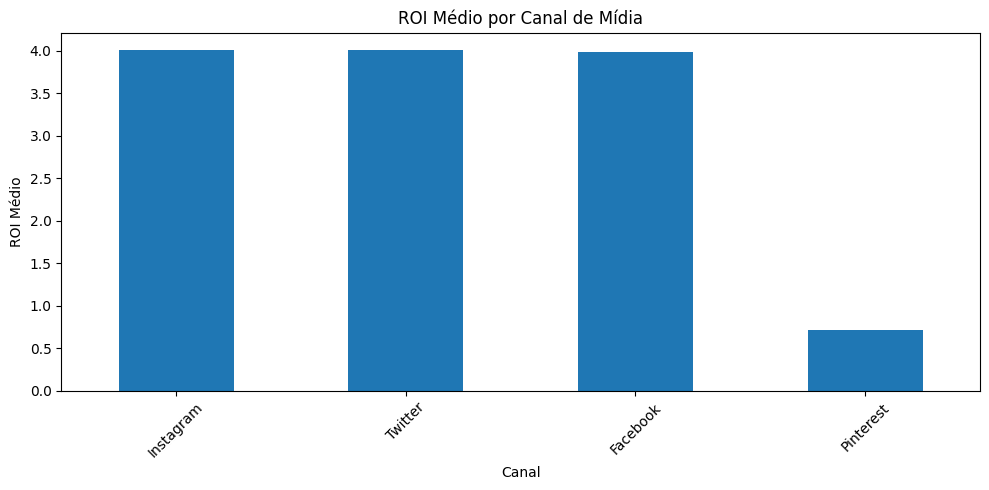

In [141]:
plt.figure(figsize=(10,5))
Canal_roi.plot(kind='bar')
plt.title("ROI Médio por Canal de Mídia")
plt.xlabel("Canal")
plt.ylabel("ROI Médio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

gráfico de linha

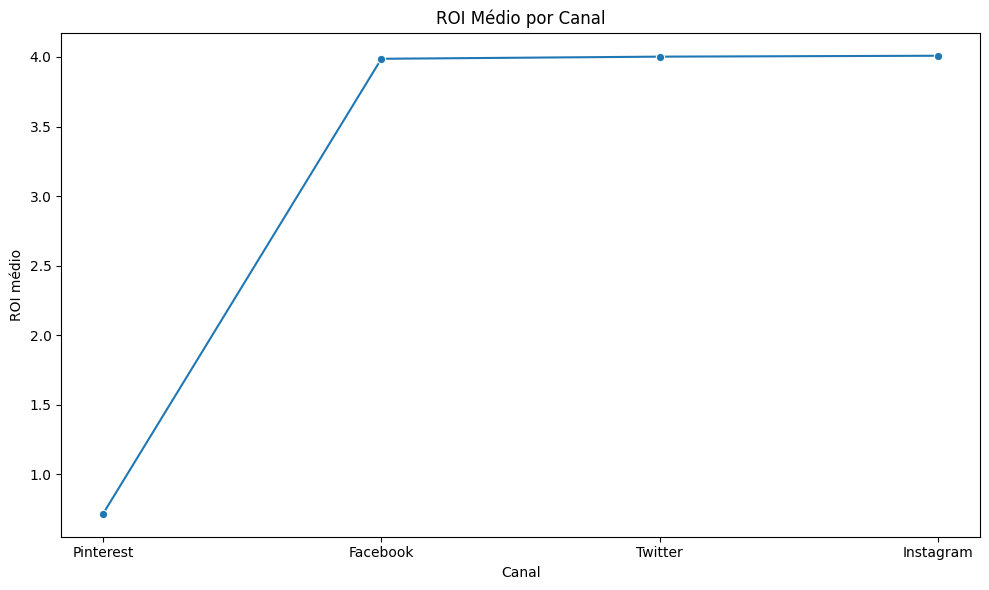

In [142]:
roi_canal = (
    df.groupby("Channel_Used")["ROI"]
    .mean()
    .reset_index()
    .sort_values("ROI")
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=roi_canal,
    x="Channel_Used",
    y="ROI",
    marker="o"
)
plt.title("ROI Médio por Canal")
plt.xlabel("Canal")
plt.ylabel("ROI médio")
plt.tight_layout()
plt.show()


#### Engajamento x Faixa etária x Canal

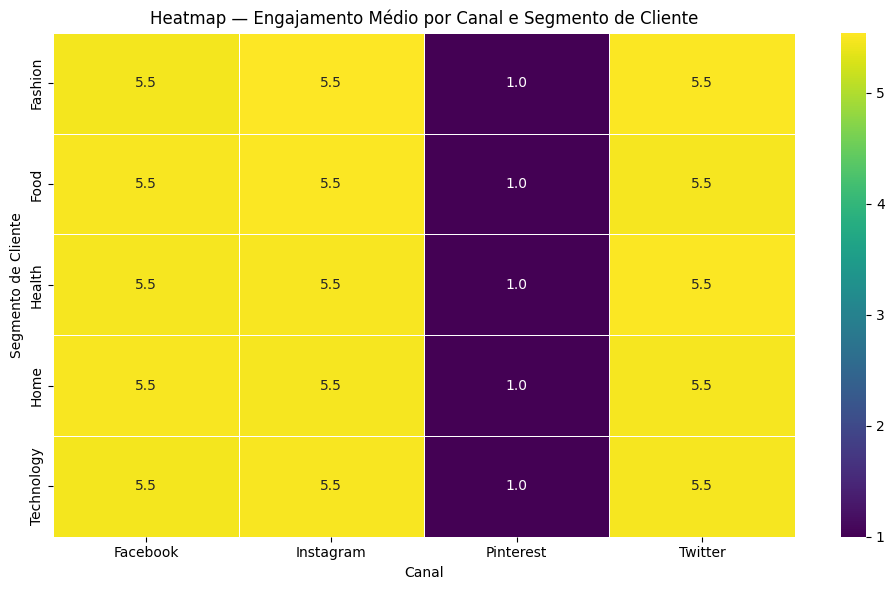

In [143]:
df_heat = df[["Channel_Used", "Customer_Segment", "Engagement_Score"]]

pivot = df_heat.pivot_table(
    index="Customer_Segment",
    columns="Channel_Used",
    values="Engagement_Score",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".1f",
    cmap="viridis",
    linewidths=0.5,
    linecolor="white"
)
plt.title("Heatmap — Engajamento Médio por Canal e Segmento de Cliente")
plt.xlabel("Canal")
plt.ylabel("Segmento de Cliente")
plt.tight_layout()
plt.show()

In [144]:
distinct_idades = pd.DataFrame({
    "Age_Min": sorted(df["Age_Min"].dropna().unique()),
    "Age_Max": sorted(df["Age_Max"].dropna().unique())
})

display(distinct_idades)


,Age_Min,Age_Max
0,18,24
1,25,34
2,35,44
3,45,60


In [145]:
df2 = df.copy()

# Faixa etária com base nas combinações existentes
conditions = [
    (df2["Age_Min"] == 18) & (df2["Age_Max"] == 24),
    (df2["Age_Min"] == 25) & (df2["Age_Max"] == 34),
    (df2["Age_Min"] == 35) & (df2["Age_Max"] == 44),
    (df2["Age_Min"] == 45) & (df2["Age_Max"] == 60)
]

labels = ["18–24", "25–34", "35–44", "45–60"]

df2["Age_Group"] = pd.cut(
    df2["Age_Min"],
    bins=[17, 24, 34, 44, 60],
    labels=labels,
    include_lowest=True
)

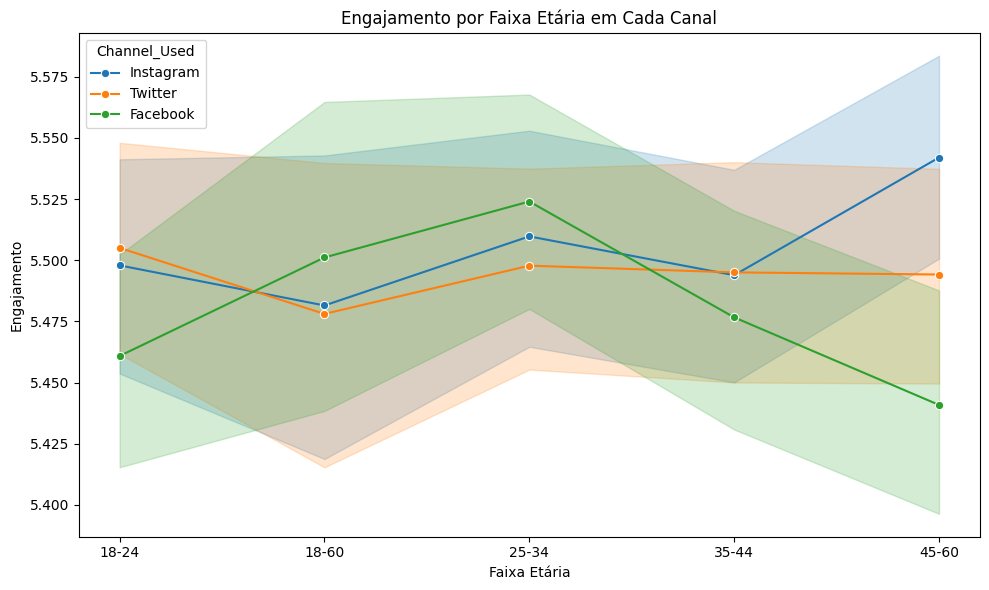

In [146]:
df["Age_Range"] = df["Age_Min"].astype(str) + "-" + df["Age_Max"].astype(str)

# Filtro sem Pinterest por ser de menor engajamento e ordenação pela idade minima
df_no_pinterest = df[df["Channel_Used"] != "Pinterest"]
df_sorted = df_no_pinterest.sort_values("Age_Min")

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_sorted,
    x="Age_Range",
    y="Engagement_Score",
    hue="Channel_Used",
    marker="o"
)
plt.title("Engajamento por Faixa Etária em Cada Canal")
plt.xlabel("Faixa Etária")
plt.ylabel("Engajamento")
plt.tight_layout()
plt.show()

#### Engajamento x Segmento Cliente

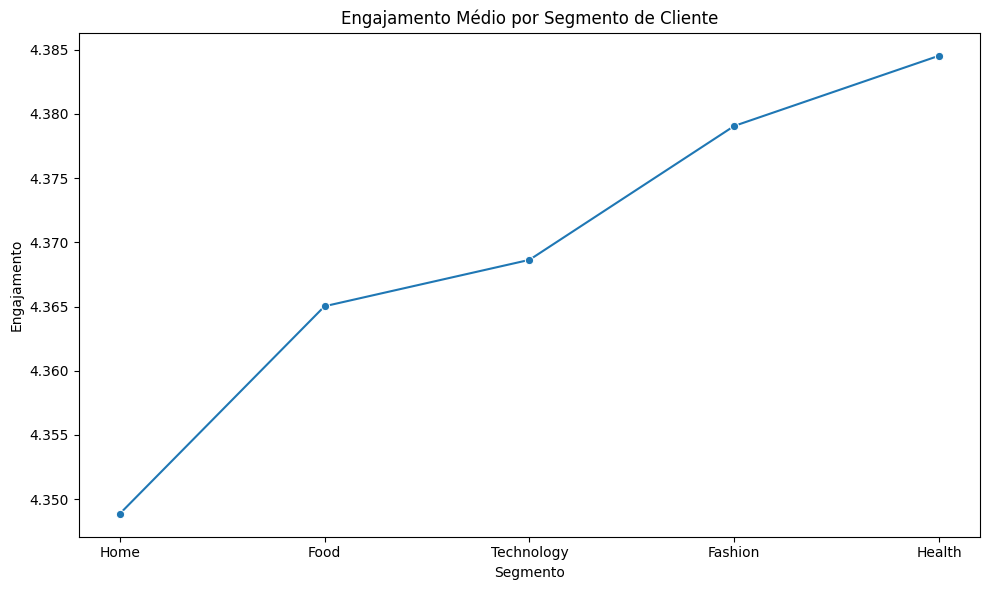

In [147]:
eng_segment = (
    df.groupby("Customer_Segment")["Engagement_Score"]
    .mean()
    .reset_index()
    .sort_values("Engagement_Score")
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=eng_segment,
    x="Customer_Segment",
    y="Engagement_Score",
    marker="o"
)
plt.title("Engajamento Médio por Segmento de Cliente")
plt.xlabel("Segmento")
plt.ylabel("Engajamento")
plt.tight_layout()
plt.show()


In [148]:
# Indicador de média de cliques por segmento de cliente
''' Comment de cliques para calculo interno apenas
cliques_por_segmento = df.groupby('Customer_Segment')['Clicks'].mean().sort_values(ascending=False)
print("Cliques médios por segmento de cliente:")
print(cliques_por_segmento)
'''

'''Cliques médios para apresentação'''
cliques_por_segmento = (
    df.groupby('Customer_Segment')['Clicks']
      .mean()
      .round()
      .astype(int)
      .sort_values(ascending=False)
)

print("Cliques médios por segmento de cliente (valores inteiros):")
print(cliques_por_segmento)

Cliques médios por segmento de cliente (valores inteiros):
Customer_Segment
Fashion       18177
Technology    18174
Home          18153
Health        18142
Food          18123
Name: Clicks, dtype: int64


In [149]:
#Cliques totais por segmento
cliques_total = (
    df.groupby('Customer_Segment')['Clicks']
      .sum()
      .sort_values(ascending=False)
)
print("Soma total de cliques por segmento de cliente:")
print(cliques_total)

Soma total de cliques por segmento de cliente:
Customer_Segment
Home          1090574808
Health        1090097207
Fashion       1089512107
Food          1088394661
Technology    1087522328
Name: Clicks, dtype: int64


#### Matrix de Correlação

Matriz de Correlação:


,Clicks,Impressions,Conversion_Rate,Engagement_Score,Acquisition_Cost,Duration_in_Days,ROI,Age_Min,Age_Max
Clicks,1.000000,0.998769,0.002046,0.200095,0.925816,0.896782,0.188343,-0.000542,-0.000076
Impressions,0.998769,1.000000,0.002054,0.176253,0.943342,0.913744,0.166009,-0.000632,-0.000325
Conversion_Rate,0.002046,0.002054,1.000000,-0.001994,0.002076,0.001047,-0.000249,-0.000997,0.000239
Engagement_Score,0.200095,0.176253,-0.001994,1.000000,-0.002732,-0.002372,0.354717,-0.000673,0.000897
Acquisition_Cost,0.925816,0.943342,0.002076,-0.002732,1.000000,0.965885,-0.001659,-0.001109,-0.001903
Duration_in_Days,0.896782,0.913744,0.001047,-0.002372,0.965885,1.000000,-0.001457,-0.000914,-0.001690
ROI,0.188343,0.166009,-0.000249,0.354717,-0.001659,-0.001457,1.000000,-0.001893,0.002130
Age_Min,-0.000542,-0.000632,-0.000997,-0.000673,-0.001109,-0.000914,-0.001893,1.000000,0.656280
Age_Max,-0.000076,-0.000325,0.000239,0.000897,-0.001903,-0.001690,0.002130,0.656280,1.000000


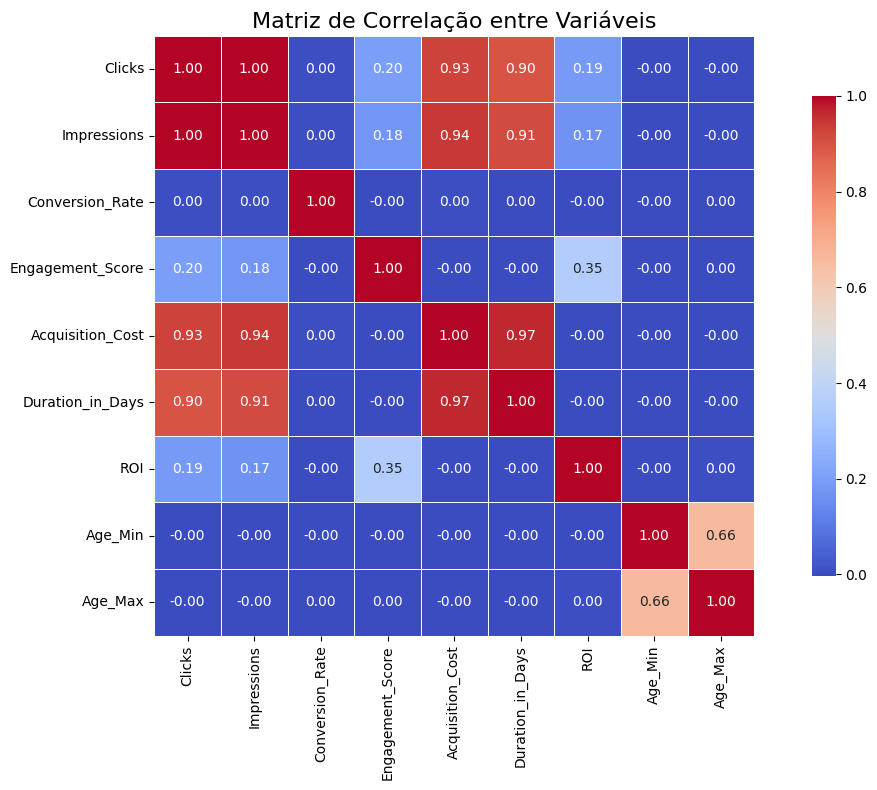


Correlação Clicks ↔ Impressions: 0.9987686003331271
Correlação Conversion_Rate ↔ Engagement_Score: -0.0019939794049703215
Correlação Acquisition_Cost ↔ ROI: -0.0016588288882778736
Correlação Age_Min ↔ Clicks: -0.0005423814359567453
Correlação Age_Max ↔ Clicks: -7.599306973050744e-05


In [150]:
cols_corr = [
    "Clicks", 
    "Impressions", 
    "Conversion_Rate", 
    "Engagement_Score",
    "Acquisition_Cost",
    "Duration_in_Days",
    "ROI",
    "Age_Min",
    "Age_Max"
]
df_corr = df[cols_corr]

# 1. Matriz de correlação

correlation_matrix = df_corr.corr()
print("Matriz de Correlação:")
display(correlation_matrix)

# 2. Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matriz de Correlação entre Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

# 3. Correlações específicas

print("\nCorrelação Clicks ↔ Impressions:", df["Clicks"].corr(df["Impressions"]))
print("Correlação Conversion_Rate ↔ Engagement_Score:", df["Conversion_Rate"].corr(df["Engagement_Score"]))
print("Correlação Acquisition_Cost ↔ ROI:", df["Acquisition_Cost"].corr(df["ROI"]))
print("Correlação Age_Min ↔ Clicks:", df["Age_Min"].corr(df["Clicks"]))
print("Correlação Age_Max ↔ Clicks:", df["Age_Max"].corr(df["Clicks"]))

In [151]:
# Conclusões dos resultados:
'''
Correlação Clicks X Impressions: Campanhas com mais impressões tendem a receber mais cliques
pois está acompanhando quase proporcionalmente o aumento de cliques.

Correlação Conversion_Rate X Engagement_Score: por estar tão baixo, o engajamento não é neste caso
preditor de conversão, pois mede interações superficiais na propaganda (como os likes ou até o tempo de visualização).
Deve haver um contexto mais específico para a sua predição.

Correlação Acquisition_Cost X ROI: Contraria totalmente o comportamento esperado, mas por se tratar de um cálculo
complexo, ele está diluído por outras variáveis, como tipo de campanha e segmento de cliente por exemplo.

Correlação Age_Min e Age_Max X Clicks: Se mostra praticamente irrelevante, e isso se deve ao dataset limitado a pouca
variabilidade etária.
'''

'\nCorrelação Clicks X Impressions: Campanhas com mais impressões tendem a receber mais cliques\npois está acompanhando quase proporcionalmente o aumento de cliques.\n\nCorrelação Conversion_Rate X Engagement_Score: por estar tão baixo, o engajamento não é neste caso\npreditor de conversão, pois mede interações superficiais na propaganda (como os likes ou até o tempo de visualização).\nDeve haver um contexto mais específico para a sua predição.\n\nCorrelação Acquisition_Cost X ROI: Contraria totalmente o comportamento esperado, mas por se tratar de um cálculo\ncomplexo, ele está diluído por outras variáveis, como tipo de campanha e segmento de cliente por exemplo.\n\nCorrelação Age_Min e Age_Max X Clicks: Se mostra praticamente irrelevante, e isso se deve ao dataset limitado a pouca\nvariabilidade etária.\n'

#### Detecção de Anomalias

In [152]:
#DETECÇÃO DE ANOMALIAS
# valores muito altos de custo de aquisição
limite_superior_ac = df["Acquisition_Cost"].mean() + 2 * df["Acquisition_Cost"].std()
anomalias_ac = df[df["Acquisition_Cost"] > limite_superior_ac]

print("\n=== Anomalias de custo de aquisição ===")
print(anomalias_ac[["Campaign_ID", "Acquisition_Cost"]])


=== Anomalias de custo de aquisição ===
Empty DataFrame
Columns: [Campaign_ID, Acquisition_Cost]
Index: []


#### Ranking de Canal com maior engajamento

In [153]:
# Canal com maior Score de engajamento
engajamento_por_canal = (df.groupby("Channel_Used")["Engagement_Score"].mean().sort_values(ascending=False))
print("\n=== Engajamento médio por canal ===")
print(engajamento_por_canal)

canal_top = engajamento_por_canal.idxmax()
valor_top = engajamento_por_canal.max()
print(f"\nCanal com maior Engagement_Score: {canal_top} ({valor_top:.2f})")



=== Engajamento médio por canal ===
Channel_Used
Instagram    5.507650
Twitter      5.495760
Facebook     5.478394
Pinterest    1.000000
Name: Engagement_Score, dtype: float64

Canal com maior Engagement_Score: Instagram (5.51)


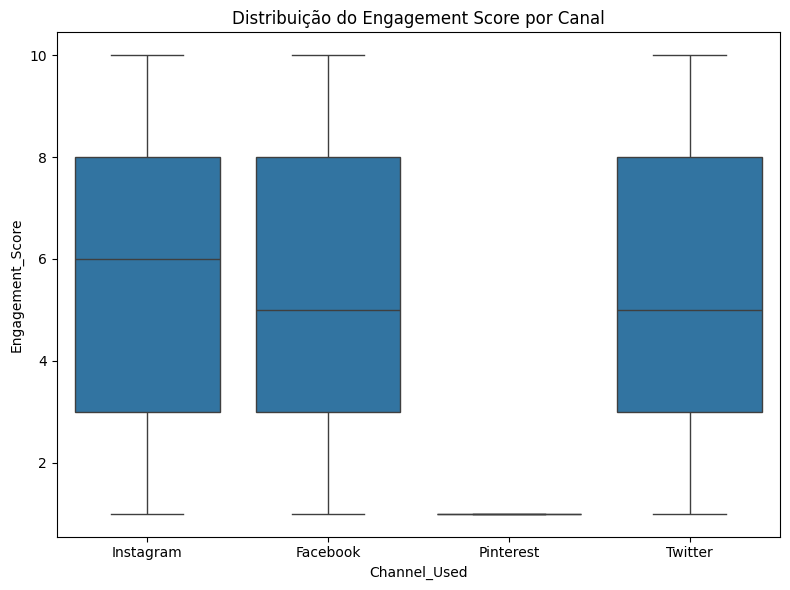

In [154]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Channel_Used", y="Engagement_Score")
plt.title("Distribuição do Engagement Score por Canal")
plt.tight_layout()
plt.show()


#### Análise de naturalidade dos dados

In [155]:
# Comprovação estatistica de dataset com uma variabilidade natural (baixa à extremamente baixa), quase "mudo"/"uniforme", fator pelo qual nenhum gráfico se torna viável a ser plotado no momento
df[["Engagement_Score", "Clicks", "Impressions", 
    "Conversion_Rate", "ROI"]].var()


Engagement_Score    9.963442e+00
Clicks              1.215952e+08
Impressions         1.061661e+09
Conversion_Rate     1.645384e-03
ROI                 6.057507e+00
dtype: float64

### O outro lado do ROI

In [156]:
categorical_cols = [
    "Channel_Used",
    "Location",
    "Language",
    "Customer_Segment",
    "Campaign_Goal",
    "_Target_Audience"
]

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Variáveis categóricas:", categorical_cols)
print("Variáveis numéricas:", num_cols)

Variáveis categóricas: ['Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Campaign_Goal', '_Target_Audience']
Variáveis numéricas: ['Campaign_ID', 'Duration_in_Days', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'Age_Min', 'Age_Max']


O canal usado está associado a altos ROIs?
A linguagem influencia a probabilidade de ROI alto?
O público atingido influencia o valor do ROI?
Os segmentos de cliente (casa, saúde, comida, tecnologia e moda) influencam no ROI?

#### importações

In [157]:
from scipy import stats
import pingouin as pg

#### Alternativa Teste sentido estatístico

Correlacinando as variáveis categóricas ao ROI sem explodir as colunas (sem one-hot encoding no caso)

In [158]:
#Ferramentas:
'''
ANOVA (se pressupostos ok)
Teste de Kruskal-Wallis (se disribuição não normal)
Tamanho do efeito (n^2 ou epsilon^2)
'''

# O que espero: se o ROI se difere entre categorias e quanto de variação ele é explicado por cada variável

'\nANOVA (se pressupostos ok)\nTeste de Kruskal-Wallis (se disribuição não normal)\nTamanho do efeito (n^2 ou epsilon^2)\n'

##### ROI contínuo ---para--> ROI categorizado

In [159]:
'''
Faixas:
-BAixo ROI
-Médio ROI
-Alto ROI
'''
# Medir Qui-quadrado de independência
# Medir V de Cramer

# Os cálculos vão permitir dizer se as questões anteriores podem ser respondidas

'\nFaixas:\n-BAixo ROI\n-Médio ROI\n-Alto ROI\n'